<a href="https://colab.research.google.com/github/sxphiaganit/test/blob/main/Copy_of_Topic_8_Improving_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Deep Learning for Computer Vision

In this section, we will learn how **Convolutional Neural Network (CNN)** can be used for computer vision.


## 1-1 Convolutional Neural Network (CNN)

CNN is widely used in computer vision applications.

The visual world forms a spatial hierarchy of visual modules.

Hyperlocal edges combine into local objects such as eyes or ears, which combine into high-level concepts like ''cat.''

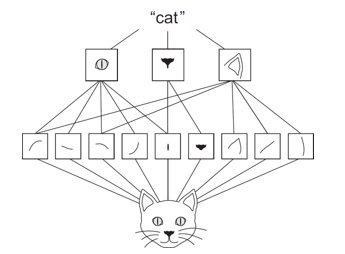

## 1-2 What is Convolution?

CNN compares an image piece by piece.
To calculate the match of a piece to a patch of the image, we have only to multiply the value of each pixel in the piece by that of the corresponding pixel in the image. This operation is called convolution.

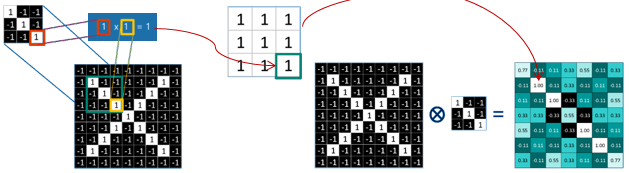

## 1-3 Characteristics of CNN

CNNs learn not global but local patterns.


*   The patterns CNN learns are translation invariant.
*   After learning a certain pattern, the CNN can recognize it anywhere.
*   CNN can learn spatial hierarchies of patterns.




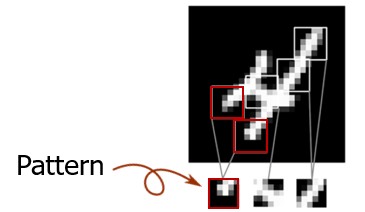

##1-4 Feature Map

Convolutions operate over 3D tensors (width, height, depth) called feature maps.

The convolution operation extracts patches from its input feature map and applies the same transformation to all of these patches, producing an output feature map.

Each slice of the output feature map is called the response map of a filter over the input.

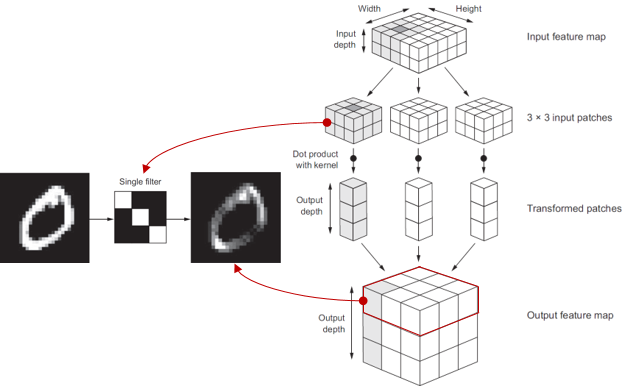

#2.An Application Example of CNN

Let us apply CNN to the classification problem of MNIST dataset.


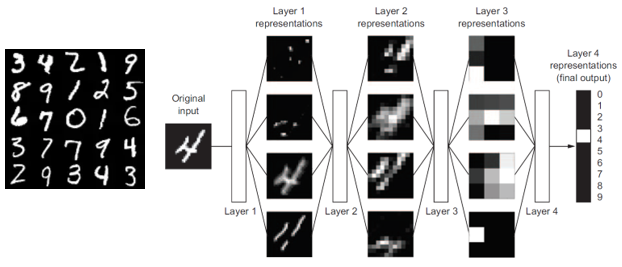

Let us build a CNN model, train it and evaluate it.

**Input:** Training data, Test data

**Step 1:** Preprocess the input data

**Step 2:** Build a layered network

**Step 3:** Configure the network by choosing a loss function and an optimizer

**Step 4:** Train the network with the training data

**Step 5:** Evaluate the network with the test data

##**Step 1: Preprocess the Input Data**


---


After loading the MNIST dataset, we transform the image into a float32 array of shape (60000, 28 * 28) with values between 0 and 1. We also categorically encode the labels.

In [1]:
from keras.datasets import mnist
from keras import models
from keras import layers
from tensorflow.keras.utils import to_categorical


import numpy as np
import matplotlib.pyplot as plt

Load the MNIST dataset.

In [2]:
(train_images, train_labels) , (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


*##*Step 2: Build a Layered Network**


---

Let us build the network which consists of a sequence of densely connected layers for our CNN using 2D convolutional layers, max pooling, and dense layers.


Let's build our model and add a few layers to our model.

In [3]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Let us get the summary of the model so that we can view the structure of our CNN layers.

In [4]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

##**Step 3: Configure the Network**


---


We need to decide a loss function and an optimizer.
The network maps the input data to predictions.


*   The [loss function](https://keras.io/api/losses/) compares these predictions to the targets, producing a loss value.
*   The [optimizer](https://keras.io/api/optimizers/) uses this loss value to update the network’s weights.

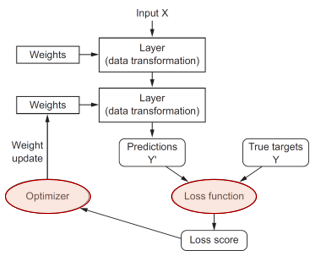

Then, let's compile the model and obtain some metrics such as loss and accuracy.

In [5]:
model.compile(optimizer = 'rmsprop',loss = 'categorical_crossentropy', metrics = ['accuracy'])

##**Step 4: Train the Network with the Training Data**


---


Let us train the network for five epochs in mini-batches of 128 samples.

This will take longer training time than a simple two layers model since more neurons are added to the hidden layers.

In [6]:
history = model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 60s 125ms/step - accuracy: 0.8181 - loss: 0.5782
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 75s 111ms/step - accuracy: 0.9804 - loss: 0.0635
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 50s 107ms/step - accuracy: 0.9872 - loss: 0.0396
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 84s 111ms/step - accuracy: 0.9907 - loss: 0.0296
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 106ms/step - accuracy: 0.9934 - loss: 0.0231


##**Step 5:** Evaluate the network with the test data
Let us display the curve of the training accuracy.

First, we obtain the *accuracy* and *loss* value and plot the changes over each epochs.

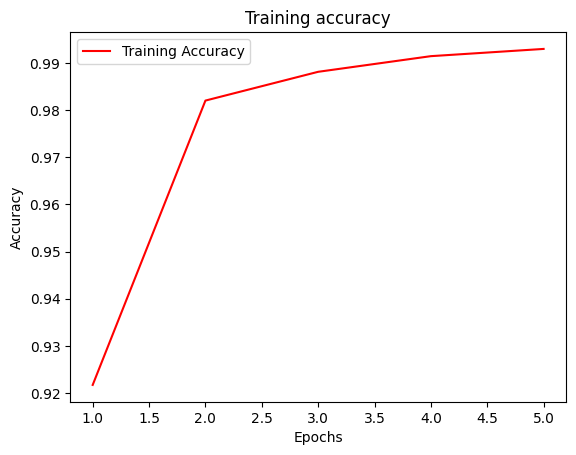

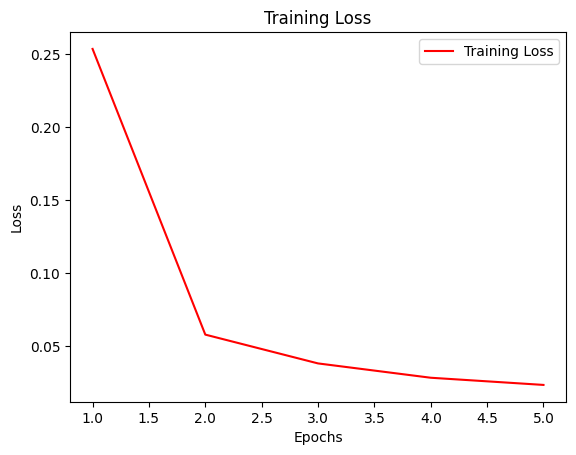

In [7]:
history_dict = history.history
history_dict
acc = history_dict['accuracy']
loss = history_dict['loss']

#plot the accuracy graph
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#plot the loss graph
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Let us evaluate the accuracy of our CNN model. The loss and accuracy is stored in the *test_loss* and *test_acc* variables.



In [8]:
test_loss, test_acc = model.evaluate(test_images, 	test_labels)
print('test_loss: ' + str(test_loss) + ' test_acc: ' + str(test_acc))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9860 - loss: 0.0404
test_loss: 0.0269631315022707 test_acc: 0.9904999732971191


# 3.Better Deep Learning

It is difficult to build and tune our deep learning model since we do not know how many layers do we need? what kind of activation function we should use? and how many neurons we should have?

Beginners tend to lost when making a CNN model achive a high accuracy. Sometimes an AI practitioner faces with problems such as overfitting and underfitting. In this section we will discuss about how to make a better deep learning models.

##3-1 Accuracy and Loss Value

Accuracy — The fraction of the images that were correctly classified

Loss value — The distance between the model’s prediction and the target.

The loss value is used to update the network’s weights by determined by the [optimizer](https://keras.io/api/optimizers/).

In [9]:
#code on Step 3 (no need to run)
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

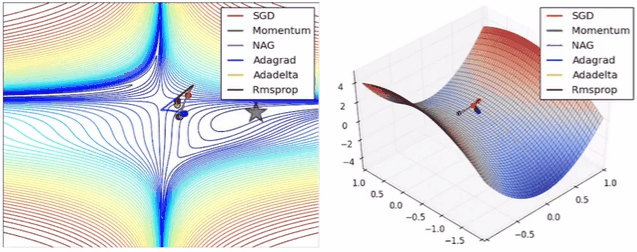

Some optimizers converge faster than others. For example, *Rmsprop* converges faster than *SGD*. Also, some optimizers achieve lower losses faster than others. For example, *Adadelta* achieves lower loss values faster than other optimizers. However, optimizers also affects the accuracy of training models. Refer to this [explanation](https://www.youtube.com/watch?v=pd3QLhx0Nm0).

Therefore, we need to observe the training loss and validation loss during training of new dataset.

##3-2 Evaluating Machine Learning Models

To evaluate a model, we should use the three data obtained by splitting the available data into three parts:

1.   Training data
2.   Validation data
3.   Test data

We train a model on the training data and evaluate it on the validation data. Once the model is ready, we test it on the test data.

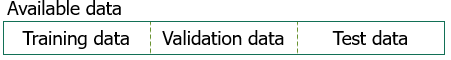

Let us create validation data of 10,000 samples by splitting the original training data.


In [10]:
#sample code (no need to run)
val_images = train_images[:10000]
train_images = train_images[10000:]
val_labels = train_labels[:10000]
train_labels = train_labels[10000:]

Then, evaluate our model using the validation data.

Run the whole modified program as follows:

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 46s 114ms/step - accuracy: 0.8151 - loss: 0.5865 - val_accuracy: 0.9752 - val_loss: 0.0838
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 43s 111ms/step - accuracy: 0.9761 - loss: 0.0748 - val_accuracy: 0.9820 - val_loss: 0.0593
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 44s 112ms/step - accuracy: 0.9862 - loss: 0.0426 - val_accuracy: 0.9849 - val_loss: 0.0476
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 45s 115ms/step - accuracy: 0.9898 - loss: 0.0320 - val_accuracy: 0.9889 - val_loss: 0.0403
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 80s 111ms/step - accuracy: 0.9927 - loss: 0.0239 - val_accuracy: 0.9843 - val_loss: 0.0538


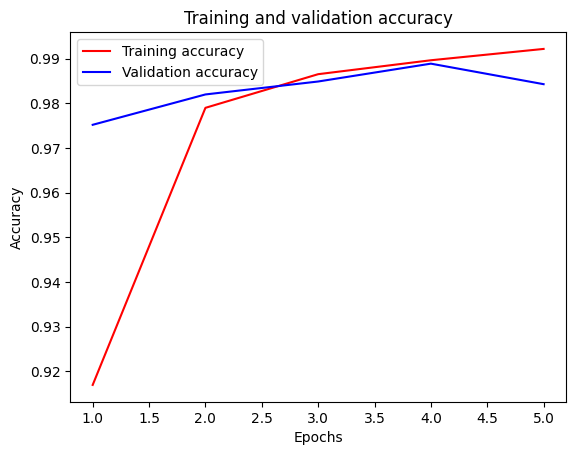

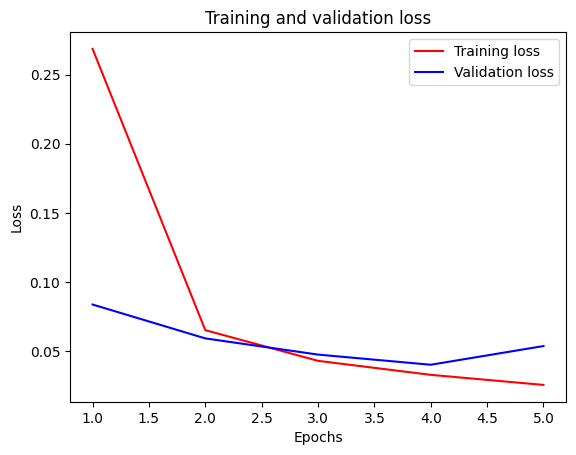

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9832 - loss: 0.0532
test_loss: 0.04060020297765732 test_acc: 0.9879999756813049


In [11]:
from keras.datasets import mnist
from keras import models
from keras import layers
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

#Load the MNIST dataset
(train_images, train_labels) , (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

#Separate the validation and training data
val_images = train_images[:10000]
train_images = train_images[10000:]
val_labels = train_labels[:10000]
train_labels = train_labels[10000:]

#Build and compile the model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

#Evaluate the model
history = model.fit(train_images, train_labels, epochs=5, batch_size=128, validation_data=(val_images, val_labels))
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_loss: ' + str(test_loss) + ' test_acc: ' + str(test_acc))


##3-3 Optimization and Generalization

The fundamental issue in machine learning is the tension between optimization and generalization.
Optimization refers to the process of adjusting a model to get the best performance possible on the training data.
Generalization refers to how well the trained model performs on non-training data.

> ***The goal is to get good generalization, but we cannot control generalization.***




##3-4 Overfitting and Underfitting

At the beginning of training, optimization and generalization are correlated. The lower the loss on training data, the lower the loss on non-training data. Such a model is said to be underfit.
But after a certain number of iterations on the training data, generalization stops improving. Such a model is said to be overfit.

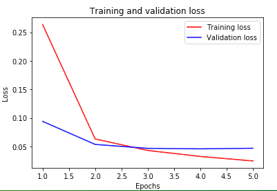

Overfitting happens in every machine learning problem. Learning how to deal with overfitting is essential.

There are common ways to prevent overfitting:

*   Get more training data
*   Adjust the capacity of the network
*   Add weight regularization
*   Add dropout

### 3-4-1 Get More Training Data
This is the best way to prevent overfitting.
A model trained on more data will naturally generalize better.
One approach is data augmentation which generates more training data from existing training samples, by augmenting the samples via a number of random transformations.

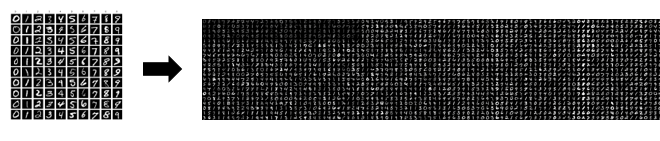

### 3-4-2 Adjust the Capacity of the Network
The simplest way to prevent overfitting is to adjust the model’s (memorization) capacity.

It is determined by :
  *   How many [hidden units](https://www.youtube.com/watch?v=bqBRET7tbiQ) to choose such as number of layers and number of units.
  *   Which [activation function](https://keras.io/api/layers/activations/) to choose such as ReLu, Sigmoid or Softmax.



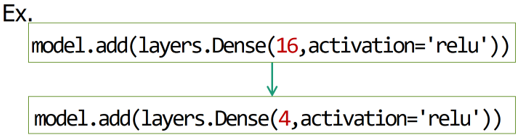

You can test and experiment on how to adjust neural network layers in [Tensorflow Playground](https://playground.tensorflow.org/). Refer to this [tutorial](https://www.youtube.com/watch?v=ru9dXF04iSE).

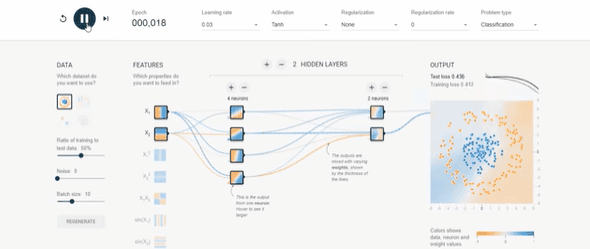

Unfortunately, there is no magical formula to determine the right number of layers or the right size for each layer.

The general workflow to find an appropriate model size is to start with relatively few layers and parameters, and then add new layers or increase the number of units per layer.

### 3-4-3 Add Weight Regularization

A common way to mitigate overfitting is to force network’s weights to take only small values. It is called as weight regularization. In Keras, we have only to pass weight regularizer instances:
regularizers.l1(0.001)
regularizers.l2(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

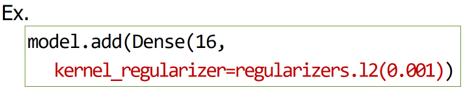

###3-4-4 Add Dropout

Dropout is one of the most effective and most commonly used regularization techniques.

By dropout, some of output features of the layer are set to zero.
In Keras, we can introduce dropout in a network via the Dropout layer, which is applied to the output of the layer right before it.

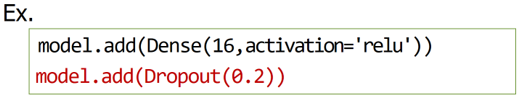

Since there are no golden rules for the tuning of good deep learning models, practitioners can use the tips mentioned above for starters and then observe the validation result of their models.

#Exercise 8

Create a deep learning model based on CNN with an accuracy more than 90%.

Use the following to fine-tune your model:

1. More than 5 layers.
2. Add weight regularizers
3. Use dropout
4. Use optimizers

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input

# Step 1: Load and prepare the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the data to a range of 0 to 1 and reshape it for the CNN
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0  # Training data
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0    # Testing data

# Step 2: Define the CNN model
model = Sequential([
    Input(shape=(28, 28, 1)),  # Define input shape explicitly
    Conv2D(32, (3, 3), activation='relu'),  # First convolutional layer
    MaxPooling2D((2, 2)),  # First pooling layer
    Dropout(0.25),         # Dropout to prevent overfitting

    Conv2D(64, (3, 3), activation='relu'),  # Second convolutional layer
    MaxPooling2D((2, 2)),  # Second pooling layer
    Dropout(0.25),

    Flatten(),  # Flatten the data for the dense layers
    Dense(128, activation='relu'),  # Fully connected layer
    Dropout(0.5),  # Dropout
    Dense(10, activation='softmax')  # Output layer for 10 classes
])
# Step 3: Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 4: Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Step 5: Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.8146 - loss: 0.5686 - val_accuracy: 0.9805 - val_loss: 0.0688
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 79s 36ms/step - accuracy: 0.9636 - loss: 0.1168 - val_accuracy: 0.9854 - val_loss: 0.0483
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 55s 37ms/step - accuracy: 0.9747 - loss: 0.0865 - val_accuracy: 0.9882 - val_loss: 0.0395
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 36ms/step - accuracy: 0.9782 - loss: 0.0705 - val_accuracy: 0.9897 - val_loss: 0.0352
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 84s 37ms/step - accuracy: 0.9806 - loss: 0.0594 - val_accuracy: 0.9901 - val_loss: 0.0327
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 53s 35ms/step - accuracy: 0.9835 - loss: 0.0541 - val_accuracy: 0.9898 - val_loss: 0.0360
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 52s 34ms/step - accuracy: 0.9840 - loss: 0.0495 - val_accuracy: 0.9919 - val_loss: 0.0352
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 84s 36ms/step - accuracy: 0.9850 -